In [1]:
import pandas as pd

In [33]:
import numpy as np

In [2]:
# 1. 'beer_serving', 'spirit_serving', 'wine_serving', 'total_liters_of_pure_alcohol'
#    컬럼의 데이터 간의 상관관계 행렬 출력
# 2. 행렬 히트맵 시각화
# 3. 1번의 4개의 컬럼 산점도 그래프 출력
# 4. 국가별 술 소비량 대비 알콜 비율 컬럼 추가
# 5. 국가별 순위 시각화하여 출력

In [5]:
drinks = pd.read_csv('../../csv/num_2/drinks.csv')

drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [8]:
# 상관계수 행렬 출력

cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')

corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [10]:
# 행렬 히트맵 시각화 라이브러리 설치

!pip install seaborn

zsh:1: /opt/homebrew/bin/pip: bad interpreter: /opt/homebrew/opt/python@3.9/bin/python3.9: no such file or directory


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

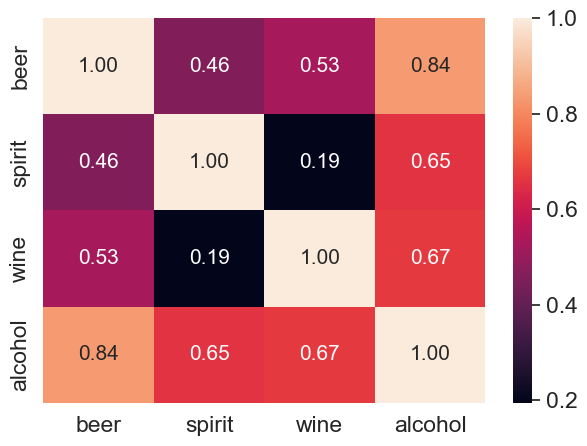

In [16]:
cols_view = ['beer', 'spirit', 'wine', 'alcohol']

sns.set(font_scale = 1.5)

hm = sns.heatmap(
    corr.values,
    cbar = True,
    annot = True,
    fmt = '.2f',
    annot_kws = {'size' : 15},
    yticklabels = cols_view,
    xticklabels = cols_view
)

plt.tight_layout()
plt.show()


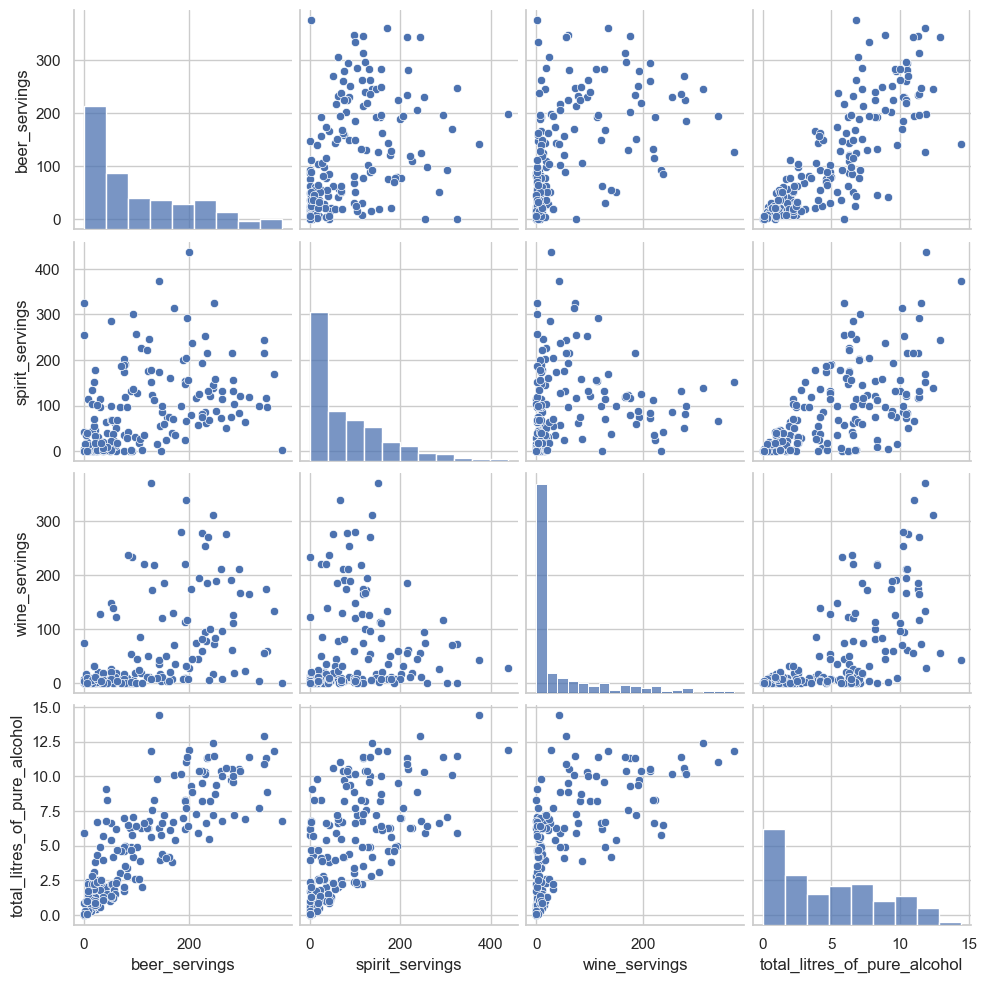

In [17]:
# 시각화 라이브러리 seaborn, 각 컬럼간의 scatter plot을 출력

sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[cols], height = 2.5)
plt.show()

In [27]:
# 파생변수 생성 → 총 술 소비량 → beer + spirit + wine: 컬럼의 이름은 total_servings
# 술 소비량 대비 알콜 비율 컬럼 → total_litres_of_pure_alcohol / total_servings: 컬럼의 이름은 alcohol_rate
# 값이 존재하지 않는 경우 → 0으로 대체

drinks['total_servings'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings']

drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']

drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

In [28]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [32]:
# 나라별 얼마나 독한 술을 먹는가

country_rank = drinks[['country', 'alcohol_rate']]

country_rank_sort = country_rank.sort_values('alcohol_rate', ascending = False)

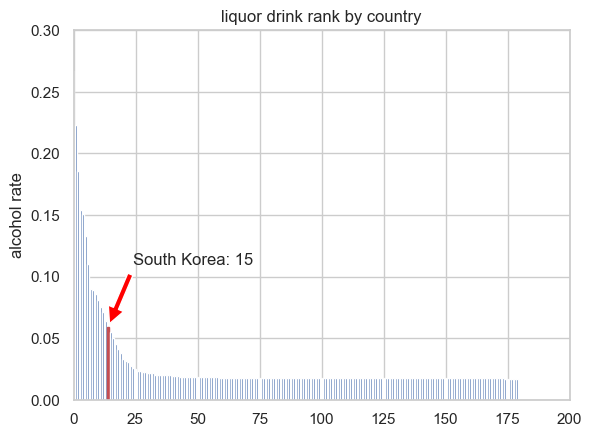

In [42]:
# 국가별 순위 정보를 그래프로 표시
# bar형 그래프 출력

x = np.arange(len(country_rank_sort))
y = country_rank_sort['alcohol_rate']

country_list = country_rank_sort['country'].tolist()
bar_list = plt.bar(x, y)
bar_list[country_list.index('South Korea')].set_color('r')

plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3])      # x축은 0 ~ 200까지, y축은 0 ~ 0.3까지 범위지정

korea_rank = country_list.index('South Korea')      # 순위를 변수에 담기
korea_alc_rate = country_rank_sort[country_rank_sort['country'] == 'South Korea']['alcohol_rate'].values[0]

plt.annotate('South Korea: ' + str(korea_rank + 1),
            xy = (korea_rank, korea_alc_rate),
            xytext = (korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops = dict(facecolor = 'red', shrink = 0.05))

plt.show()